# Entrega P1
###### Luis Martín Pérez, Andrea Santana López
---

Se importan las librerías

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1 - Tablero de Ajedrez

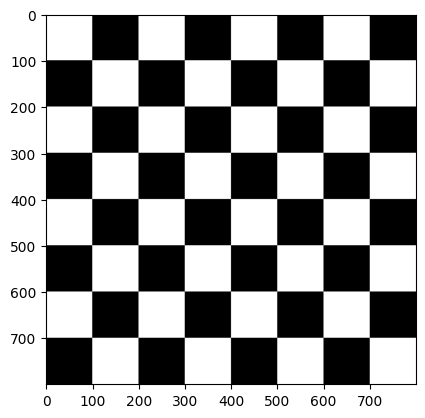

In [3]:
board_size = 800
cell_number = 8
cell_size = int(board_size / cell_number)
chess_board_img = np.zeros((board_size, board_size, 1), dtype=np.uint8)

for row in range(cell_number):
    for column in range(0, cell_number, 2):
        cell_x = row * cell_size
        cell_y = (column + row%2) * cell_size
        chess_board_img[cell_x:cell_x + cell_size, cell_y:cell_y + cell_size, 0] = 255

plt.imshow(chess_board_img, cmap='gray',vmin=0, vmax=255)

### 2 - Imagen estilo ***Mondrian***

True

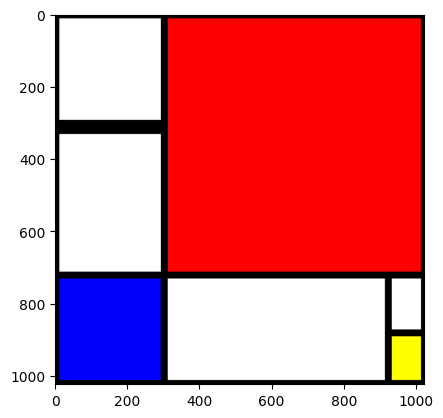

In [4]:
mondrian_size = 1024

divisions = 50
division_size = int(mondrian_size / divisions)
margin = int(mondrian_size % divisions / 2)

mondrian_img = np.zeros((mondrian_size, mondrian_size, 3), dtype=np.uint8)

class Rectangle:
    def __init__(self, x, y, end_x, end_y, color):
        self.x = x
        self.y = y
        self.end_x = end_x
        self.end_y = end_y
        self.color = color

rectangles = [
    Rectangle(15,0,50,35,(255,0,0)),
    Rectangle(0,0,14,14,(255,255,255)),
    Rectangle(0,16,14,35,(255,255,255)),
    Rectangle(0,36,14,50,(0,0,255)),
    Rectangle(15,36,45,50,(255,255,255)),
    Rectangle(46,36,50,43,(255,255,255)),
    Rectangle(46,44,50,50,(255,255,0)),
]

for r in rectangles:
    start_x = r.x * division_size + margin
    start_y = r.y * division_size + margin
    width = r.end_x - r.x
    height = r.end_y - r.y
    cv2.rectangle(mondrian_img,(start_x ,start_y), (start_x + division_size * width, start_y + division_size * height), r.color,-1)


plt.imshow(mondrian_img)
bgr_img = cv2.cvtColor(mondrian_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('mondrian.jpg', bgr_img)

### 3 - Modificar los planos de color

In [5]:
vid = cv2.VideoCapture(0)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        new_size = (int(w*0.6),int(h/2))
        new_size_rgb = (new_size[1], new_size[0], 3)
        frame = cv2.resize(frame, new_size, cv2.INTER_NEAREST)

        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        red = np.zeros(new_size_rgb, dtype = np.uint8)
        blue = np.zeros(new_size_rgb, dtype = np.uint8)
        green = np.zeros(new_size_rgb, dtype = np.uint8)

        yellow = np.zeros(new_size_rgb, dtype = np.uint8)
        magenta = np.zeros(new_size_rgb, dtype = np.uint8)
        cyan = np.zeros(new_size_rgb, dtype = np.uint8)

        invert_red = np.zeros(new_size_rgb, dtype = np.uint8)
        invert_green = np.zeros(new_size_rgb, dtype = np.uint8)
        invert_blue = np.zeros(new_size_rgb, dtype = np.uint8)

        creepy_1 = np.zeros(new_size_rgb, dtype = np.uint8)
        creepy_2 = np.zeros(new_size_rgb, dtype = np.uint8)
        creepy_3 = np.zeros(new_size_rgb, dtype = np.uint8)

        red[:,:,2] = r
        green[:,:,1] = g
        blue[:,:,0] = b

        yellow[:,:,2] = r
        yellow[:,:,1] = g

        magenta[:,:,2] = r
        magenta[:,:,0] = b

        cyan[:,:,1] = g
        cyan[:,:,0] = b

        invert_red[:,:,2] = 255 - r
        invert_red[:,:,1] = g
        invert_red[:,:,0] = b

        invert_green[:,:,2] = r
        invert_green[:,:,1] = 255 - g
        invert_green[:,:,0] = b

        invert_blue[:,:,2] = r
        invert_blue[:,:,1] = g
        invert_blue[:,:,0] = 255 - b

        creepy_1[:,:,2] = 140 - r
        creepy_1[:,:,1] = b/3
        creepy_1[:,:,0] = 0

        creepy_2[:,:,2] = 60 - b
        creepy_2[:,:,1] = 0
        creepy_2[:,:,0] = g

        creepy_3[:,:,2] = 255 - b
        creepy_3[:,:,1] = 60 - r
        creepy_3[:,:,0] = 30 - g



        rgb_collage = np.hstack((red, green, blue))
        ymc_collage = np.hstack((yellow, magenta, cyan))
        invert_collage = np.hstack((invert_red, invert_green, invert_blue))
        creepy_collage = np.hstack((creepy_1, creepy_2, creepy_3))
        collage = np.vstack((rgb_collage, ymc_collage, invert_collage, creepy_collage))
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Color planes', collage)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

[255 255 255]
[0 1 0]


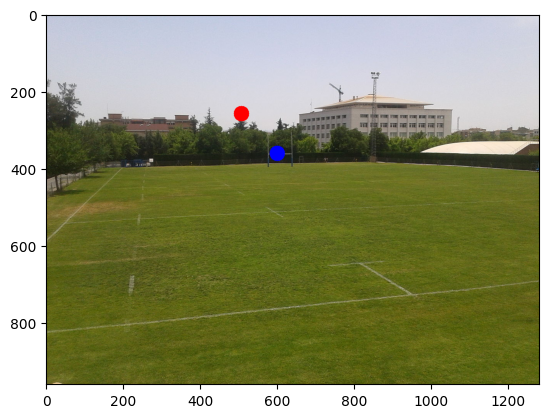

In [6]:


pixels = cv2.imread("CAMPO.jpg", cv2.IMREAD_COLOR)
pixels=cv2.cvtColor(pixels,cv2.COLOR_BGR2RGB)
oscuro,claro = np.array([255, 255, 255], dtype=np.int32),np.array([0, 0, 0], dtype=np.int32)
coordXYC,coordXYO=[0,0],[0,0]

for fila in range(0,pixels.shape[0]):
    for columna in range(0,pixels.shape[1]):
          pixel = pixels[fila, columna].astype(np.int32)
          if np.sum(pixel) > np.sum(claro):
            claro = pixel
            coordXYC = [fila, columna]
          if np.sum(pixel) < np.sum(oscuro):
            oscuro = pixel
            coordXYO = [fila, columna]

pixels = pixels.astype(np.uint8)
print(pixels[coordXYC[0],coordXYC[1]])
print(pixels[coordXYO[0],coordXYO[1]])
cv2.circle(pixels, (coordXYC[1], coordXYC[0]), 20, color=(255, 0, 0), thickness=-1)
cv2.circle(pixels, (coordXYO[1], coordXYO[0]), 20, color=(0, 0, 255), thickness=-1)
plt.imshow(pixels)
plt.show()
